# 1. Introduction

This notebook aims to analyze the COVID-19 dataset to understand its structure, clean it, and extract valuable insights.  
The analysis includes visualizations, statistical measures, and data cleaning procedures.  

Dataset Source: [Novel Corona Virus 2019 Dataset](https://www.kaggle.com/datasets/sudalairajkumar/novel-corona-virus-2019-dataset)


# 2. Dataset Loading and Overview



This section focuses on loading the dataset and reviewing its structure.  
Key actions include inspecting the dataset for missing values and identifying column types.

In [1]:
# Importing essential libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import seaborn as sns  # For visualizations
import matplotlib.pyplot as plt  # For plotting

# Loading the dataset
file_path = '/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv'
data = pd.read_csv(file_path)

# Display the first 5 rows of the dataset
print("Preview of the dataset:")
print(data.head())

# Summary of the dataset
print("\nDataset information:")
print(data.info())

# Checking for missing values
print("\nNumber of missing values in each column:")
print(data.isnull().sum())


Preview of the dataset:
   SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0  

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Pr

# 3. Data Cleaning

This section addresses missing values and drops unnecessary columns.  
Artificial NaN values are also added to simulate real-world scenarios, and strategies are applied to handle them.

In [2]:
# Checking column names
print("Checking column names...")
print(data.columns)

# If you want to drop 'ObservationDate' or 'Country/Region', do so, but make sure to check if the column exists first
# Let's drop 'ObservationDate' as an example:
if 'ObservationDate' in data.columns:
    data.drop(columns=['ObservationDate'], inplace=True)

# After dropping irrelevant columns, add NaN values artificially to simulate real-world data issues
print("Adding NaN values artificially...")
columns_to_nan = ['Confirmed', 'Deaths', 'Recovered']  # Columns to add NaN values

# Adding NaN to 10% of the data for these columns
for col in columns_to_nan:
    data.loc[data.sample(frac=0.1).index, col] = np.nan

# Checking for NaN values in the dataset after adding NaN artificially
print("\nAfter adding artificial NaN values:")
print(data.isnull().sum())

# Handle missing values by filling them with suitable methods:
# Fill missing 'Confirmed' with the mean, 'Deaths' with 0, and 'Recovered' with the median
print("\nHandling missing values...")
data['Confirmed'] = data['Confirmed'].fillna(data['Confirmed'].mean())
data['Deaths'] = data['Deaths'].fillna(0)  # Filling missing death counts with 0
data['Recovered'] = data['Recovered'].fillna(data['Recovered'].median())

# Checking after handling missing values
print("\nAfter handling missing values:")
print(data.isnull().sum())


Checking column names...
Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')
Adding NaN values artificially...

After adding artificial NaN values:
SNo                   0
Province/State    78103
Country/Region        0
Last Update           0
Confirmed         30643
Deaths            30643
Recovered         30643
dtype: int64

Handling missing values...

After handling missing values:
SNo                   0
Province/State    78103
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64


# 4. Exploratory Data Analysis 

Exploratory Data Analysis explores the dataset to uncover trends and summarize key metrics.  
Steps include calculating basic statistics and identifying country-wise trends.

In [3]:
# Basic summary statistics
print("Summary statistics:")
print(data.describe())

# Aggregating confirmed cases by country
country_cases = data.groupby('Country/Region')['Confirmed'].sum().reset_index()

# Top 10 countries with the highest confirmed cases
top_countries = country_cases.nlargest(10, 'Confirmed')
print("\nTop 10 countries with the most confirmed cases:")
print(top_countries)


Summary statistics:
                 SNo     Confirmed         Deaths     Recovered
count  306429.000000  3.064290e+05  306429.000000  3.064290e+05
mean   153215.000000  8.564771e+04    1835.811287  4.558465e+04
std     88458.577156  2.627824e+05    6146.341810  1.920175e+05
min         1.000000  0.000000e+00    -178.000000 -8.544050e+05
25%     76608.000000  1.406000e+03       3.000000  3.200000e+01
50%    153215.000000  1.519600e+04     121.000000  1.753000e+03
75%    229822.000000  8.564771e+04    1061.000000  1.601400e+04
max    306429.000000  5.845010e+06  112385.000000  6.399531e+06

Top 10 countries with the most confirmed cases:
    Country/Region     Confirmed
214             US  5.678622e+09
96           India  3.025426e+09
27          Brazil  2.472863e+09
172         Russia  1.101051e+09
71          France  8.020247e+08
213             UK  7.526038e+08
194          Spain  6.501820e+08
102          Italy  6.391563e+08
212         Turkey  5.717515e+08
44        Colombia  5.687

# 5. Statistical Analysis

This section calculates statistical metrics such as death rates and identifies patterns in the data.  
Correlations between key variables are also explored.

In [4]:
# Creating a new column for Death Rate
data['DeathRate'] = (data['Deaths'] / data['Confirmed']) * 100

# Displaying top 5 countries with the highest death rates
death_rate_by_country = data.groupby('Country/Region')['DeathRate'].mean().reset_index()
top_death_rates = death_rate_by_country.nlargest(5, 'DeathRate')
print("\nTop 5 countries with the highest death rates:")
print(top_death_rates)



Top 5 countries with the highest death rates:
    Country/Region  DeathRate
36          Canada        inf
42           Chile        inf
197          Sudan        inf
213             UK        inf
225          Yemen   19.44062


# 6. Visualizations

Visualizations provide a clearer understanding of data patterns.  
Key trends are analyzed using bar plots, line plots, and heatmaps.

## Global Growth of Confirmed Cases Over Time (Logarithmic Scale)

Checking 'Last Update' column...
0    1/22/2020 17:00
1    1/22/2020 17:00
2    1/22/2020 17:00
3    1/22/2020 17:00
4    1/22/2020 17:00
Name: Last Update, dtype: object


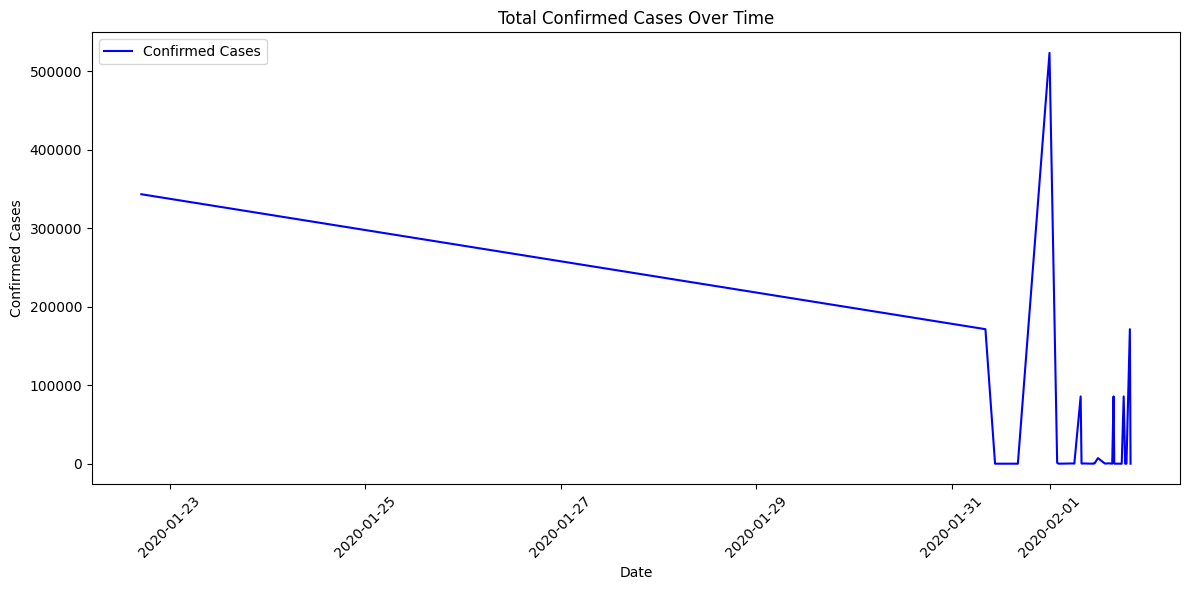

In [5]:
# Check if 'Last Update' column contains date information
print("Checking 'Last Update' column...")
print(data['Last Update'].head())

# Convert 'Last Update' to datetime format if it contains date information
data['Last Update'] = pd.to_datetime(data['Last Update'], errors='coerce')  # Handling errors if any

# Grouping data by 'Last Update' for time-series analysis
time_series = data.groupby('Last Update')['Confirmed'].sum().reset_index()

# Plotting the time-series data
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(time_series['Last Update'], time_series['Confirmed'], label='Confirmed Cases', color='b')
plt.title('Total Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()
plt.show()


## Confirmed vs. Deaths by Country (Bar Plot)

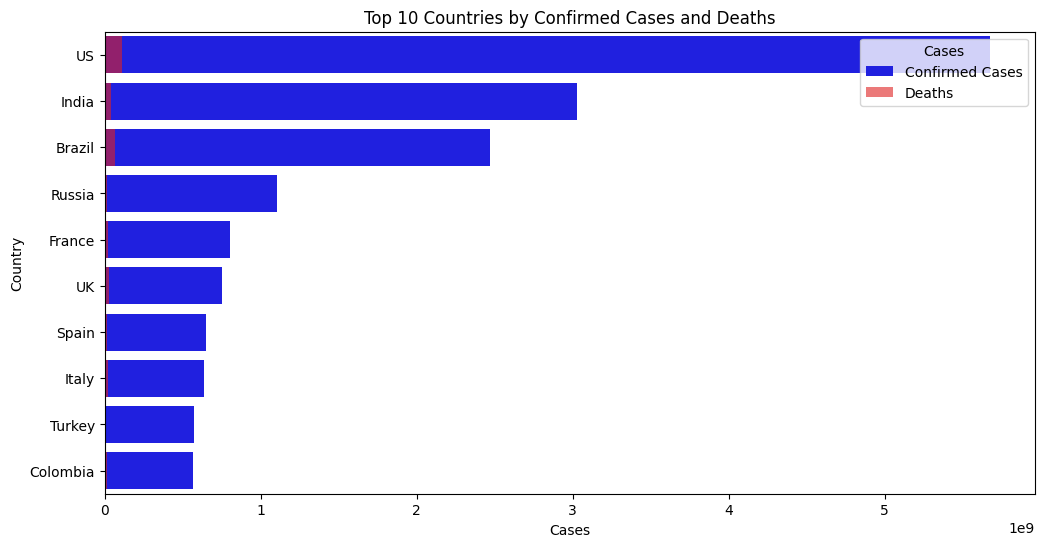

In [6]:
# Grouping by 'Country/Region' for confirmed cases and deaths
country_data = data.groupby('Country/Region')[['Confirmed', 'Deaths']].sum().reset_index()

# Sorting by confirmed cases
country_data_sorted = country_data.sort_values(by='Confirmed', ascending=False).head(10)

# Plotting the bar chart for confirmed cases and deaths
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.barplot(x='Confirmed', y='Country/Region', data=country_data_sorted, color='blue', label='Confirmed Cases')
sns.barplot(x='Deaths', y='Country/Region', data=country_data_sorted, color='red', label='Deaths', alpha=0.6)

plt.title('Top 10 Countries by Confirmed Cases and Deaths')
plt.xlabel('Cases')
plt.ylabel('Country')
plt.legend(title='Cases', loc='upper right')
plt.show()


## Recovered vs. Confirmed by Country (Bar Plot)

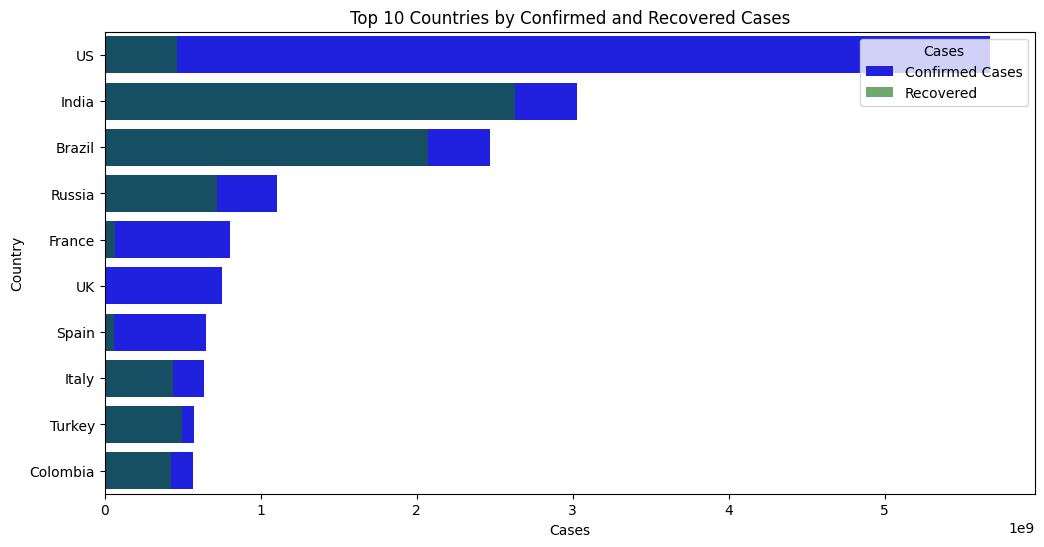

In [7]:
# Grouping by 'Country/Region' for confirmed and recovered cases
country_recovery_data = data.groupby('Country/Region')[['Confirmed', 'Recovered']].sum().reset_index()

# Sorting by confirmed cases
country_recovery_sorted = country_recovery_data.sort_values(by='Confirmed', ascending=False).head(10)

# Plotting bar plot for confirmed and recovered cases
plt.figure(figsize=(12, 6))
sns.barplot(x='Confirmed', y='Country/Region', data=country_recovery_sorted, color='blue', label='Confirmed Cases')
sns.barplot(x='Recovered', y='Country/Region', data=country_recovery_sorted, color='green', label='Recovered', alpha=0.6)

plt.title('Top 10 Countries by Confirmed and Recovered Cases')
plt.xlabel('Cases')
plt.ylabel('Country')
plt.legend(title='Cases', loc='upper right')
plt.show()


## Death Rate (Deaths / Confirmed) by Country (Bar Plot)

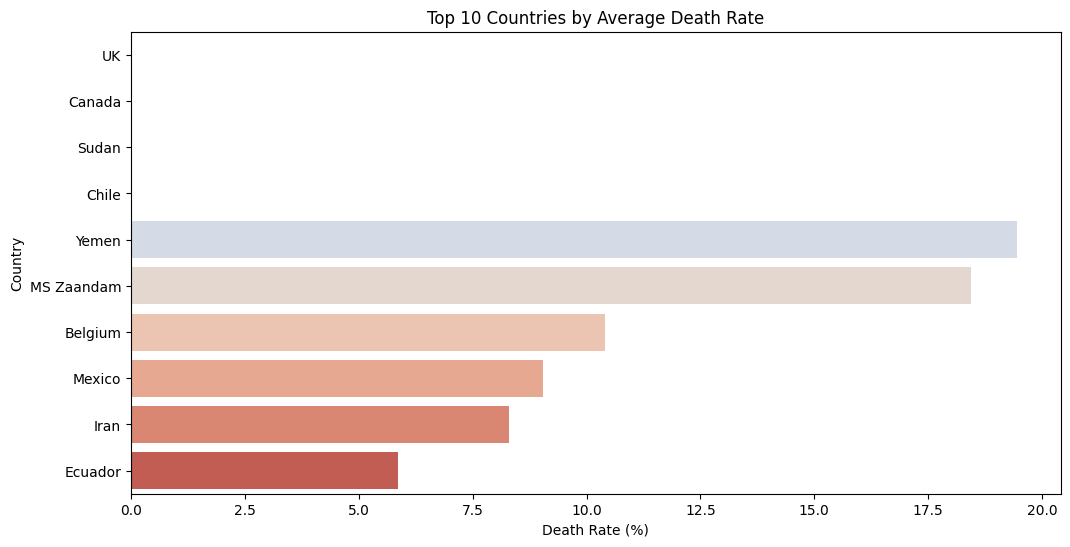

In [8]:
# Adding a new column for death rate
data['DeathRate'] = data['Deaths'] / data['Confirmed'] * 100  # Death rate as percentage

# Grouping by country and calculating average death rate
country_death_rate = data.groupby('Country/Region')['DeathRate'].mean().reset_index()

# Sorting by death rate
country_death_rate_sorted = country_death_rate.sort_values(by='DeathRate', ascending=False).head(10)

# Plotting death rate by country
plt.figure(figsize=(12, 6))
sns.barplot(x='DeathRate', y='Country/Region', data=country_death_rate_sorted, palette='coolwarm')

plt.title('Top 10 Countries by Average Death Rate')
plt.xlabel('Death Rate (%)')
plt.ylabel('Country')
plt.show()


# 7. Conclusion and Insights

- Countries with the highest confirmed cases and death rates have been identified.  
- Death rates vary significantly, highlighting disparities in healthcare systems.  
- The time series analysis shows a consistent rise in confirmed cases globally.  

These insights can guide further investigations, such as:
1. Exploring the factors contributing to high death rates.
2. Predicting future cases using ML algorithms.
3. Assessing the impact of government interventions on recovery rates.